# Classification (supervised learning)

The notebook aims to study and implement classification (supervised learning) using "sklearn". The iris dataset will be used to classify.


## Acknowledgments

- Used dataset: https://archive.ics.uci.edu/ml/datasets/iris

- Inquiries: mauricio.antelis@tec.mx


# Importing libraries

In [ ]:
# Import the packages that we will be using
import numpy as np                  # For array
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting
import matplotlib.pyplot as plt     # For showing plots

# Note: specific functions of the "sklearn" package will be imported when needed to show concepts easily


# Importing data

In [ ]:
# Define the col names for the iris dataset
colnames = ["Sepal_Length", "Sepal_Width","Petal_Length","Petal_Width", "Flower"]

# Dataset url
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Load the dataset from HHDD
dataset  = pd.read_csv(url, header = None, names = colnames )

dataset


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Undertanding and preprocessing the data

1. Get a general 'feel' of the data


In [ ]:
# Print dataset
dataset.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# Print dataset shape
print(dataset.shape)


(150, 5)


In [ ]:
# Print column names
dataset.columns


Index(['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width', 'Flower'], dtype='object')

2. Drop rows with any missing values


In [ ]:
# Drop na
dataset = dataset .dropna()

print(dataset.shape)


(150, 5)


3. Encoding the class label categorical column: from string to num


In [ ]:
# Encoding the categorical column: {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2}
dataset = dataset.replace({"Flower":  {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2} })

#Visualize the dataset
dataset

<ipython-input-51-6cf562935661>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset = dataset.replace({"Flower":  {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2} })


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Flower
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


Now the label/category is numeric


4. Discard columns that won't be used


In [ ]:
# # Drop out non necesary columns
# dataset.drop(['Sepal_Length', 'Sepal_Width'],axis='columns',inplace=True)
#
# #Visualize the dataset
# dataset


5. Scatter plot of the data

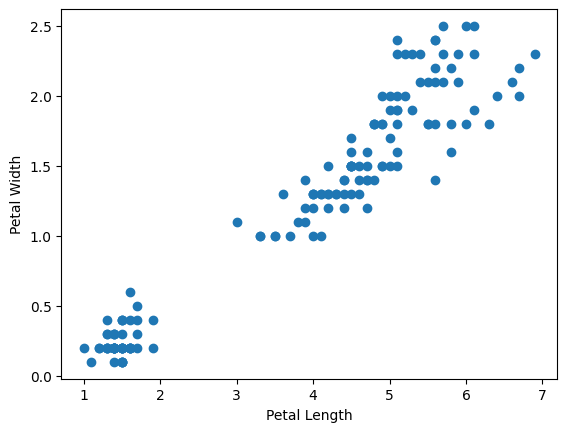

In [ ]:
# Scatter plot of Petal_Length vs Petal_Width
plt.scatter(dataset.Petal_Length,dataset.Petal_Width)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()


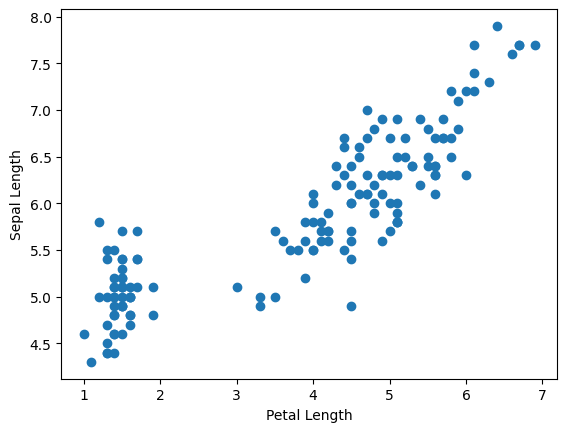

In [ ]:
# Scatter plot of Petal_Length vs Sepal_Length
plt.scatter(dataset.Petal_Length,dataset.Sepal_Length)
plt.xlabel('Petal Length')
plt.ylabel('Sepal Length')
plt.show()


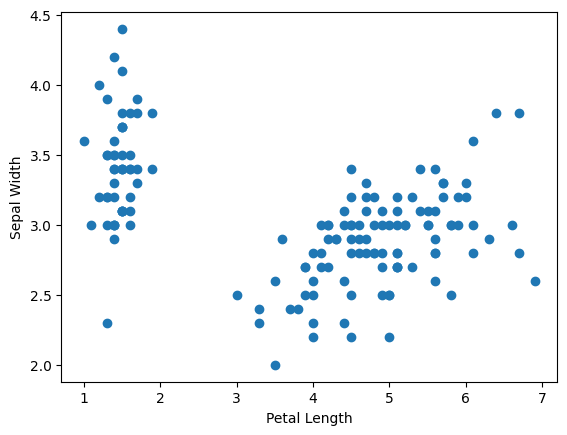

In [ ]:
# Scatter plot of Petal_Length vs Sepal_Width
plt.scatter(dataset.Petal_Length,dataset.Sepal_Width)
plt.xlabel('Petal Length')
plt.ylabel('Sepal Width')
plt.show()


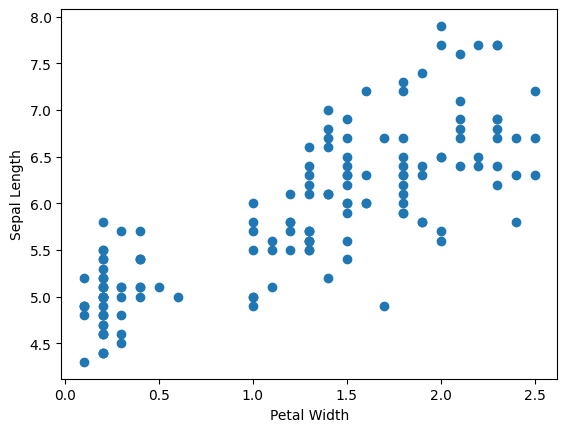

In [ ]:
# Scatter plot of Petal_Width vs Sepal_Length
plt.scatter(dataset.Petal_Width,dataset.Sepal_Length)
plt.xlabel('Petal Width')
plt.ylabel('Sepal Length')
plt.show()


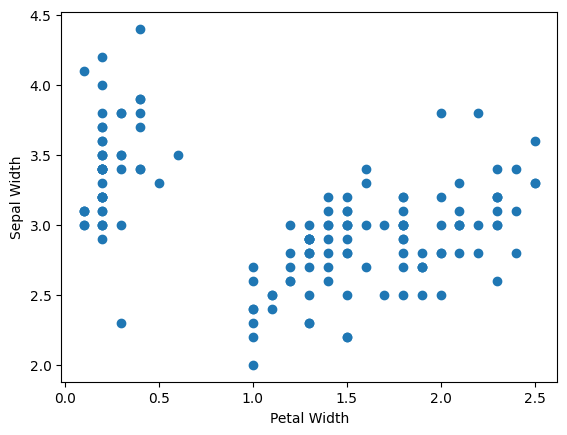

In [ ]:
# Scatter plot of Petal_Width vs Sepal_Width
plt.scatter(dataset.Petal_Width,dataset.Sepal_Width)
plt.xlabel('Petal Width')
plt.ylabel('Sepal Width')
plt.show()


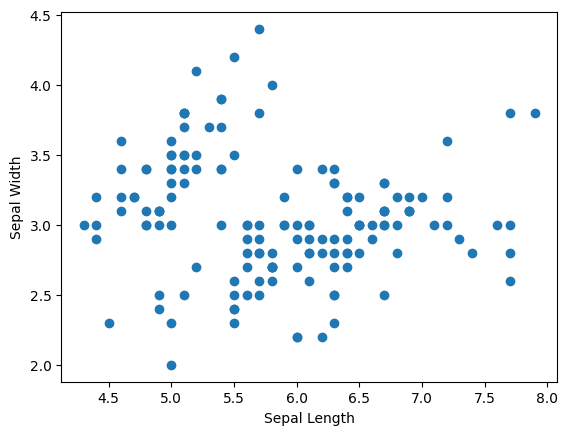

In [ ]:
# Scatter plot of Sepal_Length vs Sepal_Width
plt.scatter(dataset.Sepal_Length,dataset.Sepal_Width)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()


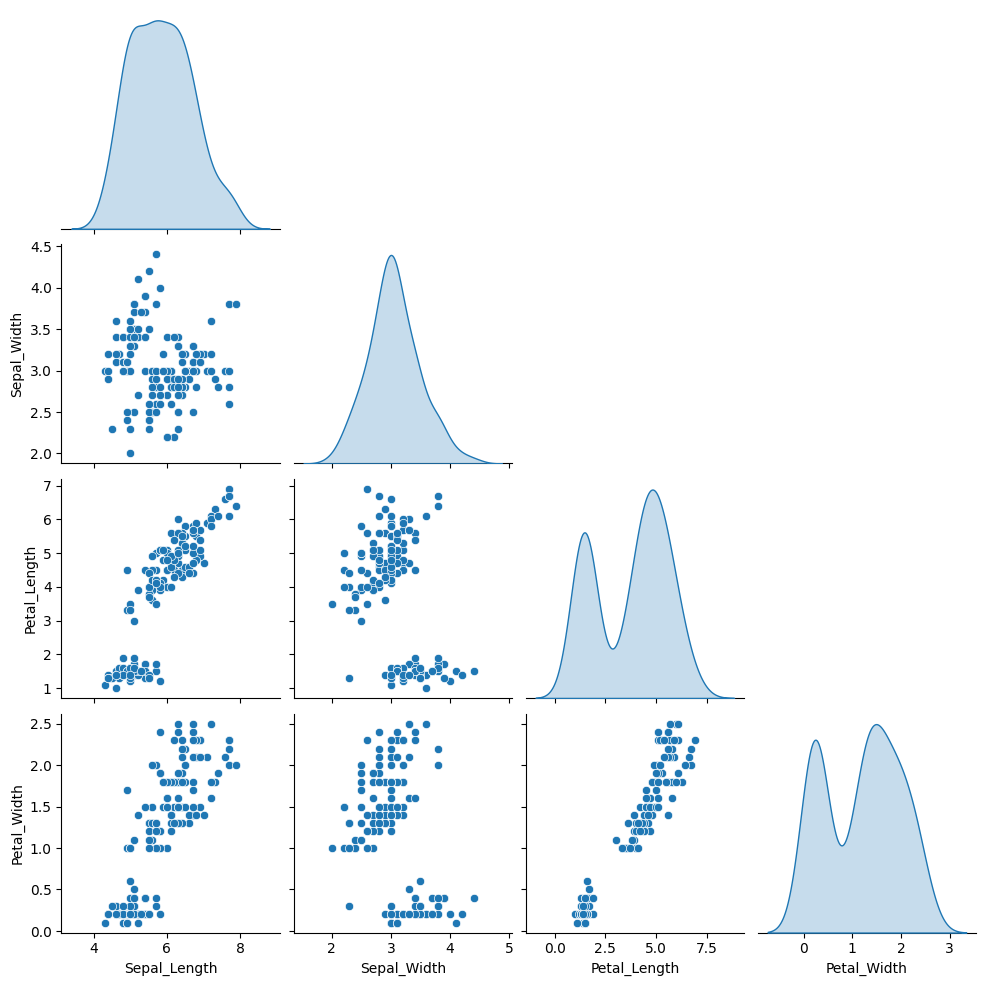

In [ ]:
# Pairplot: Scatterplot of all variables (not the flower type)
g = sns.pairplot(dataset[['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']], corner=True, diag_kind="kde")
#g.map_lower(sns.kdeplot, levels=4, color=".2")
plt.show()


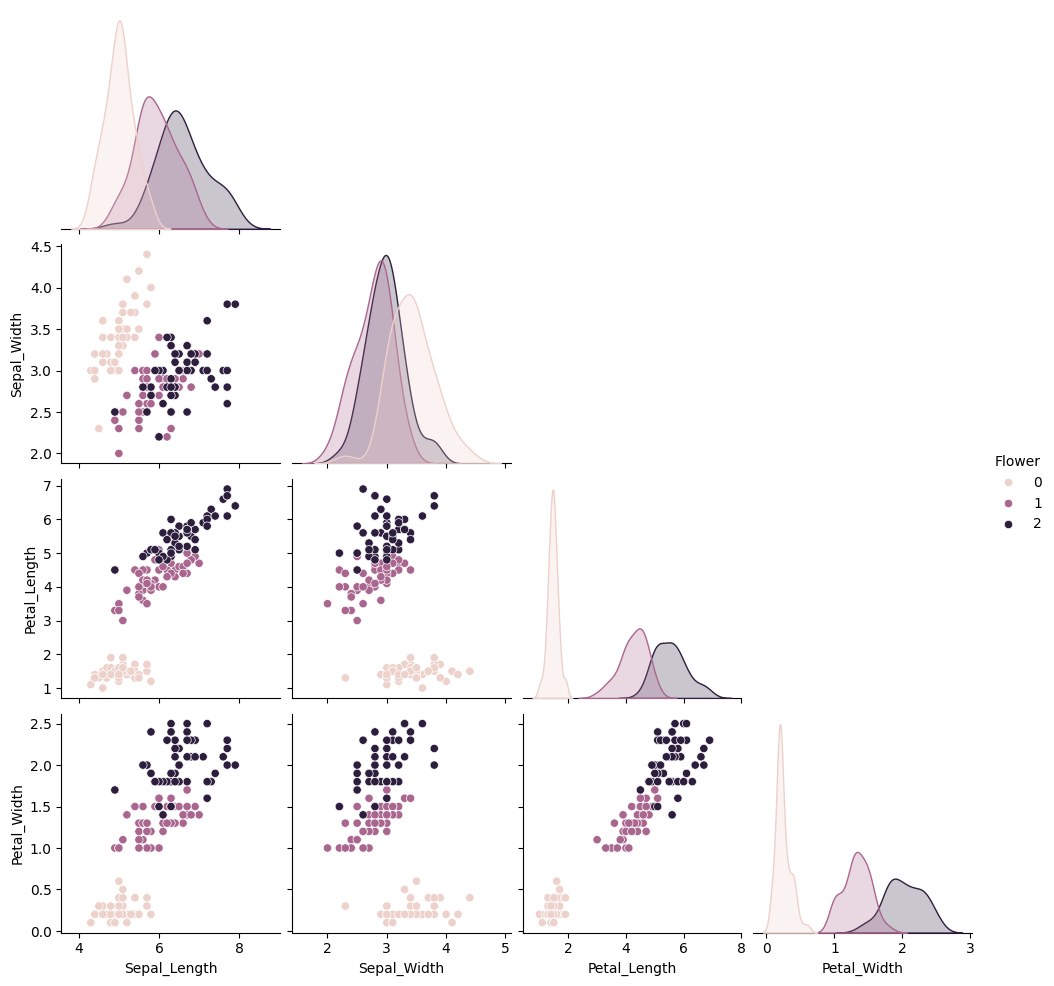

In [ ]:
# Pairplot: Scatterplot of all variables (not the flower type)
g = sns.pairplot(dataset, corner=True, diag_kind="kde", hue='Flower')
#g.map_lower(sns.kdeplot, levels=4, color=".2")
plt.show()


6. Scatter plot of the data asigning each point to the cluster it belongs to ¡¡

In [ ]:
# Get dataframes for each real cluster
df1 = dataset[dataset.Flower==0]
df2 = dataset[dataset.Flower==1]
df3 = dataset[dataset.Flower==2]


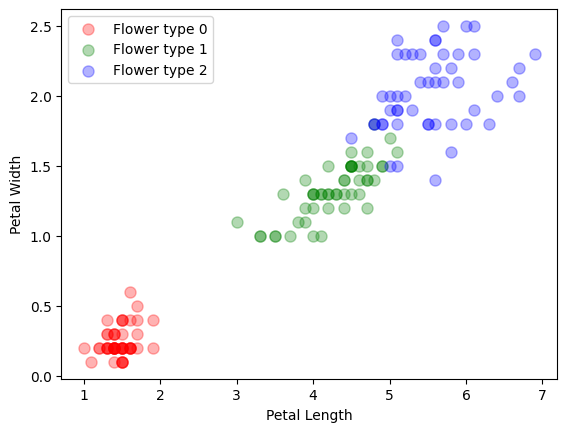

In [ ]:
# Scatter plot of each real cluster for Petal
plt.scatter(df1.Petal_Length, df1.Petal_Width, label='Flower type 0', c='r', marker='o', s=64, alpha=0.3)
plt.scatter(df2.Petal_Length, df2.Petal_Width, label='Flower type 1', c='g', marker='o', s=64, alpha=0.3)
plt.scatter(df3.Petal_Length, df3.Petal_Width, label='Flower type 2', c='b', marker='o', s=64, alpha=0.3)

plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()
plt.show()


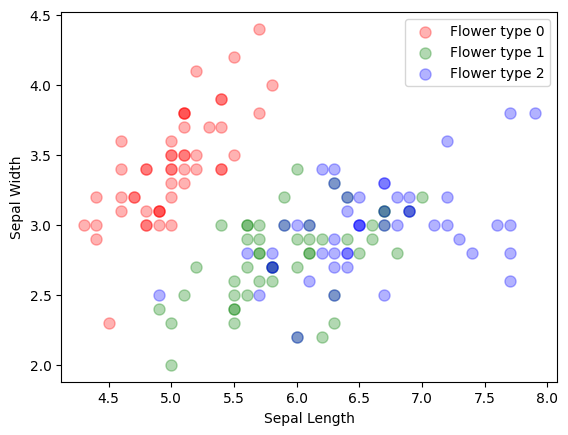

In [ ]:
# Scatter plot of each real cluster for Sepal
plt.scatter(df1.Sepal_Length, df1.Sepal_Width, label='Flower type 0', c='r', marker='o', s=64, alpha=0.3)
plt.scatter(df2.Sepal_Length, df2.Sepal_Width, label='Flower type 1', c='g', marker='o', s=64, alpha=0.3)
plt.scatter(df3.Sepal_Length, df3.Sepal_Width, label='Flower type 2', c='b', marker='o', s=64, alpha=0.3)

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()


Recall that for this dataset we know in advance the class to which each point belongs to

# Activity: work with the iris dataset

Repeat this tutorial with the iris data set and respond to the following inquiries

1. Plot the histograms for each of the four quantitative variables


2. Plot the histograms for each of the quantitative variables


3. Plot the boxplots for each of the quantitative variables


4. Plot the boxplots of the petal width grouped by type of flower


5. Plot the boxplots of the setal length grouped by type of flower


6. Provide a description (explaination from your observations) of each of the quantitative variables


   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


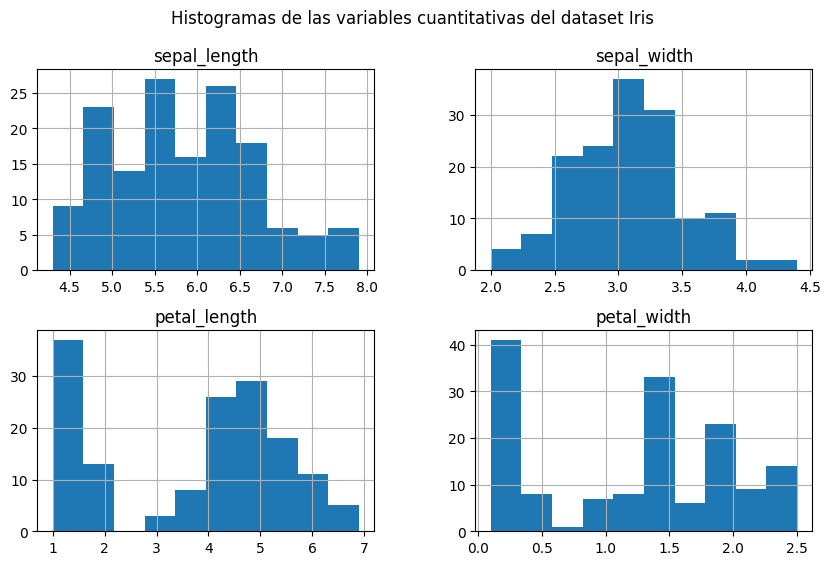

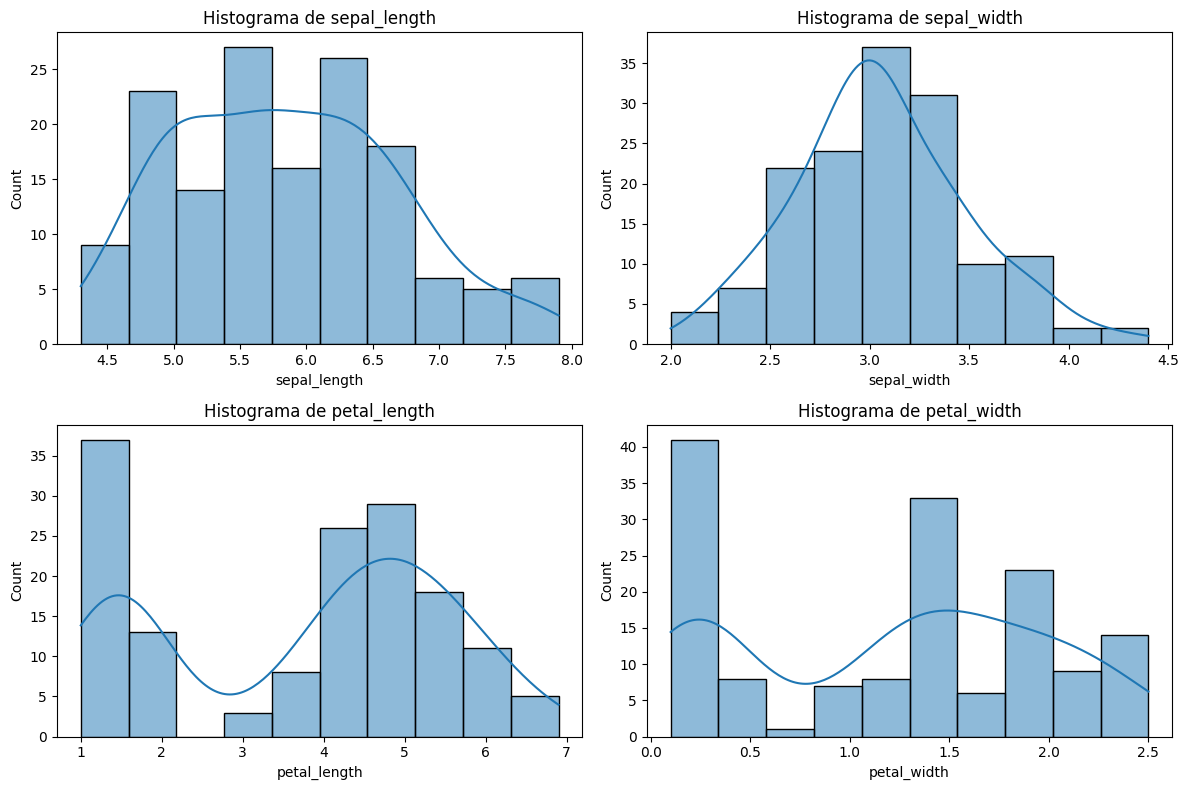

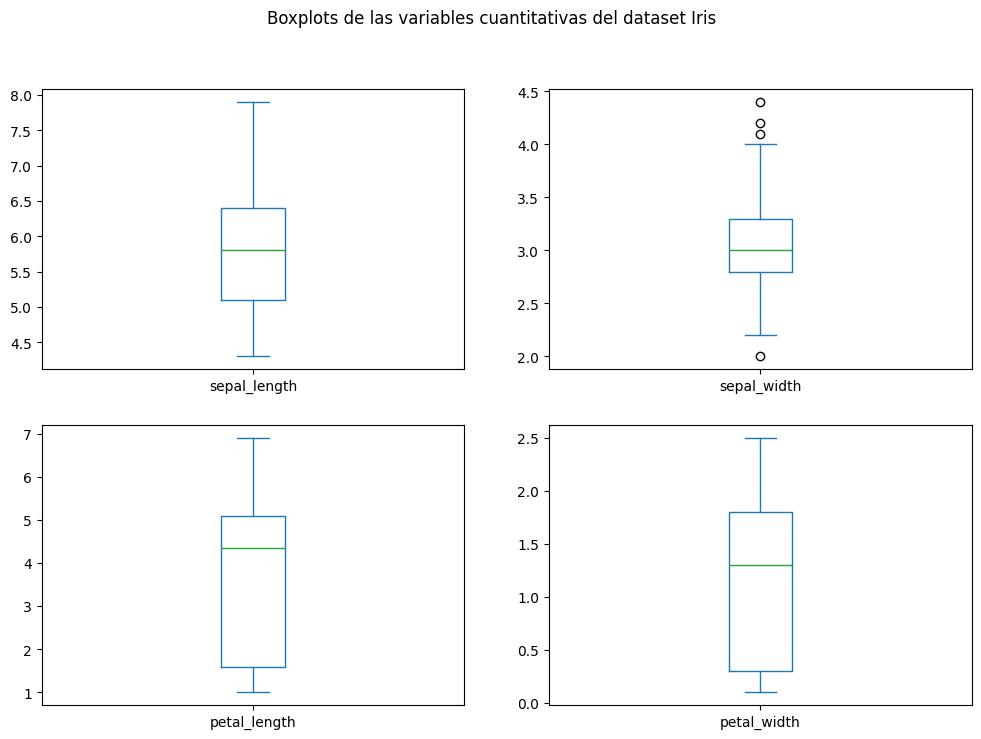

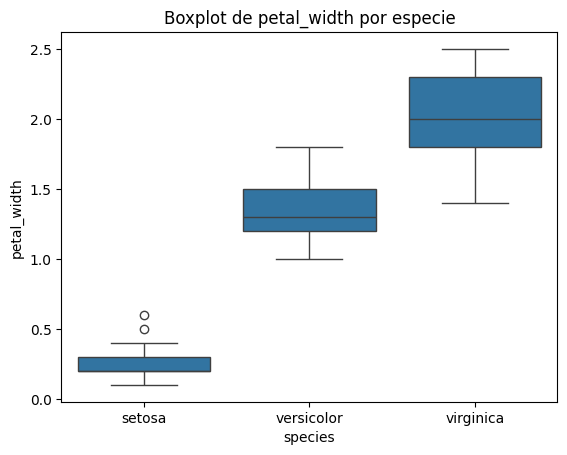

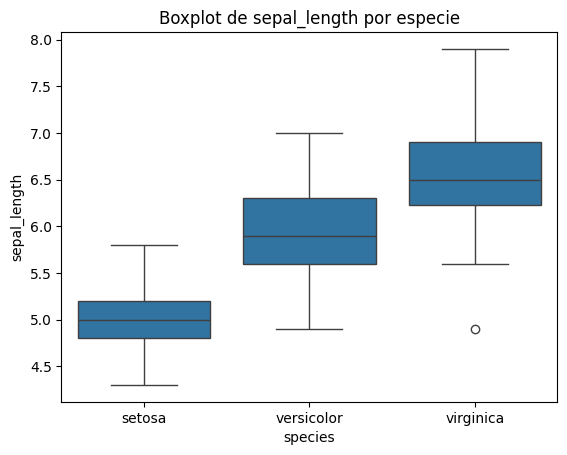

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

- **Sepal Length:** Tiene un rango entre ~4.3 y 7.9 cm. La especie setosa tiene valores más bajos en comparación con las otras especies.
- **Sepal Width:** Varía entre ~2.0 y 4.4 cm. Es la única variable donde hay mayor superposición entre especies.
- **Petal Length:** Claramente separa las especies; setosa tiene pétalos más cortos (~1-2 cm) y las otras especies tienen valores más altos (~3-6 cm).
- **Petal Width:** Similar a petal length, setosa tiene va

In [1]:
# Importar paquetes
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar dataset de Iris desde Seaborn
df = sns.load_dataset("iris")

# Ver las primeras filas del dataset
print(df.head())

# 1. Histogramas de cada una de las variables cuantitativas
df.hist(figsize=(10, 6), bins=10)
plt.suptitle("Histogramas de las variables cuantitativas del dataset Iris")
plt.show()

# 2. Histogramas para cada una de las variables cuantitativas (otra forma)
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
variables = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
for i, var in enumerate(variables):
    sns.histplot(df[var], bins=10, kde=True, ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(f"Histograma de {var}")

plt.tight_layout()
plt.show()

# 3. Boxplots para cada variable cuantitativa
df.plot(kind="box", subplots=True, layout=(2, 2), figsize=(12, 8))
plt.suptitle("Boxplots de las variables cuantitativas del dataset Iris")
plt.show()

# 4. Boxplot de "petal_width" agrupado por tipo de flor
sns.boxplot(x="species", y="petal_width", data=df)
plt.title("Boxplot de petal_width por especie")
plt.show()

# 5. Boxplot de "sepal_length" agrupado por tipo de flor
sns.boxplot(x="species", y="sepal_length", data=df)
plt.title("Boxplot de sepal_length por especie")
plt.show()

# 6. Descripción de las variables cuantitativas
print(df.describe())

# Observaciones sobre las variables
description = """
- **Sepal Length:** Tiene un rango entre ~4.3 y 7.9 cm. La especie setosa tiene valores más bajos en comparación con las otras especies.
- **Sepal Width:** Varía entre ~2.0 y 4.4 cm. Es la única variable donde hay mayor superposición entre especies.
- **Petal Length:** Claramente separa las especies; setosa tiene pétalos más cortos (~1-2 cm) y las otras especies tienen valores más altos (~3-6 cm).
- **Petal Width:** Similar a petal length, setosa tiene valores muy bajos (~0.1-0.6 cm), mientras que versicolor y virginica tienen valores mucho más altos (~1.0-2.5 cm).
"""
print(description)


# Activity: work with the iris dataset

Repeat this tutorial with the iris data set and respond to the following inquiries

1. Calculate the statistical summary for each quantitative variables. Explain the results
    - Identify the name of each column
    - Identify the type of each column
    - Minimum, maximum, mean, average, median, standar deviation
    
    
2. Are there missing data? If so, create a new dataset containing only the rows with the non-missing data


3. Create a new dataset containing only the petal width and length and the type of Flower


4. Create a new dataset containing only the setal width and length and the type of Flower


5. Create a new dataset containing the setal width and length and the type of Flower encoded as a categorical numerical column


In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from seaborn import load_dataset

# Cargar el dataset Iris desde seaborn
df = load_dataset("iris")

# Mostrar las primeras filas
print("Primeras 5 filas del DataFrame:")
print(df.head())

# Dimensiones del DataFrame
print("\nDimensiones del DataFrame:", df.shape)

# Nombres y tipos de columnas
print("\nNombres de columnas:", df.columns)
print("\nTipos de datos:")
print(df.dtypes)


Primeras 5 filas del DataFrame:
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

Dimensiones del DataFrame: (150, 5)

Nombres de columnas: Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

Tipos de datos:
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


In [4]:
# Calcular estadísticas para variables cuantitativas
print("\nResumen estadístico:")
print(df.describe())

# Calcular estadísticas específicas
print("\nValores específicos:")
print(f"Min:\n{df.min(numeric_only=True)}") # Filter for numeric columns
print(f"Max:\n{df.max(numeric_only=True)}") # Filter for numeric columns
print(f"Mean:\n{df.mean(numeric_only=True)}") # Filter for numeric columns
print(f"Median:\n{df.median(numeric_only=True)}") # Filter for numeric columns
print(f"Standard Deviation:\n{df.std(numeric_only=True)}") # Filter for numeric columns


Resumen estadístico:
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

Valores específicos:
Min:
sepal_length    4.3
sepal_width     2.0
petal_length    1.0
petal_width     0.1
dtype: float64
Max:
sepal_length    7.9
sepal_width     4.4
petal_length    6.9
petal_width     2.5
dtype: float64
Mean:
sepal_length    5.843333
sepal_width     3.057333
petal_length    3.758000
petal_width     1.199333
dtype: float64
Median:
sepal_length    5.80
sepal_width     3.00
petal_length    4.35
petal_width     1.30
dty

In [5]:
# Verificar valores nulos
print("\nValores nulos en cada columna:")
print(df.isnull().sum())

# Crear un dataset sin valores nulos si los hubiera
df_clean = df.dropna()



Valores nulos en cada columna:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [6]:
# Dataset con solo petal width, petal length y species
df_petal = df[['petal_width', 'petal_length', 'species']]
print("\nPrimeras filas del dataset de pétalos:")
print(df_petal.head())

# Dataset con solo sepal width, sepal length y species
df_sepal = df[['sepal_width', 'sepal_length', 'species']]
print("\nPrimeras filas del dataset de sépalos:")
print(df_sepal.head())



Primeras filas del dataset de pétalos:
   petal_width  petal_length species
0          0.2           1.4  setosa
1          0.2           1.4  setosa
2          0.2           1.3  setosa
3          0.2           1.5  setosa
4          0.2           1.4  setosa

Primeras filas del dataset de sépalos:
   sepal_width  sepal_length species
0          3.5           5.1  setosa
1          3.0           4.9  setosa
2          3.2           4.7  setosa
3          3.1           4.6  setosa
4          3.6           5.0  setosa


In [7]:
# Codificar 'species' como valores numéricos
encoder = LabelEncoder()
df_sepal['species_encoded'] = encoder.fit_transform(df_sepal['species'])

# Mostrar el dataset modificado
print("\nDataset con species codificado:")
print(df_sepal.head())



Dataset con species codificado:
   sepal_width  sepal_length species  species_encoded
0          3.5           5.1  setosa                0
1          3.0           4.9  setosa                0
2          3.2           4.7  setosa                0
3          3.1           4.6  setosa                0
4          3.6           5.0  setosa                0


<ipython-input-7-6ff89418654c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sepal['species_encoded'] = encoder.fit_transform(df_sepal['species'])
